In [15]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [16]:
import numpy as np
from chainconsumer import ChainConsumer
from corner import corner

In [17]:
! ls -l *chain*.npy

-rw-r--r-- 1 swmclau2 des 10106508 Jul 20 09:41 2000w_10000s_sham_chain.npy
-rw-r--r-- 1 swmclau2 des  4411324 Jul 23 14:55 ab_sham_chain.npy
-rw-r--r-- 1 swmclau2 des  8172218 Jul 23 15:06 ab_sham_chain_alt_model.npy
-rw-r--r-- 1 swmclau2 des  4366736 Jul 23 15:01 sham_chain.npy
-rw-r--r-- 1 swmclau2 des  8272577 Jul 23 15:05 sham_chain_alt_model.npy


In [18]:
! ls -lt /u/ki/swmclau2/des/PearceMCMC/*chain*.npy

-rw-r--r-- 1 swmclau2 des   5101195 Oct 30 23:36 /u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_steps_chain_shuffled_sham_no_nd.npy
-rw-r--r-- 1 swmclau2 des  15000000 Oct 30 17:09 /u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_steps_chain_wt_redmagic_z0.23.npy
-rw-r--r-- 1 swmclau2 des  12500000 Oct 19 21:07 /u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_steps_chain_shuffled_sham.npy
-rw-r--r-- 1 swmclau2 des  15000000 Oct  6 23:07 /u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_steps_chain_test_emulator_bias.npy
-rw-r--r-- 1 swmclau2 des  15000000 Sep 28 21:42 /u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_steps_chain_old_errors_2.npy
-rw-r--r-- 1 swmclau2 des  15000000 Sep 28 08:41 /u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_steps_chain_old_errors.npy
-rw-r--r-- 1 swmclau2 des  60000000 Sep 27 05:31 /u/ki/swmclau2/des/PearceMCMC/100_walkers_4000_steps_chain_normal_errors_resumed.npy
-rw-r--r-- 1 swmclau2 des  15000000 Sep 22 22:40 /u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_ste

In [19]:
#fname = 'ab_sham_chain.npy'
#fname = '/u/ki/swmclau2/des/PearceMCMC/chain.npy'
fname = '/u/ki/swmclau2/des/PearceMCMC/100_walkers_1000_steps_chain_wt_redmagic_z0.23.npy'

In [20]:
chain = np.genfromtxt(fname  )

In [21]:
chain.shape

(100000, 6)

In [22]:
n_walkers = 100
n_params = chain.shape[1]

In [23]:
c = chain.reshape((n_walkers, -1, n_params))
print c.shape
chain = c[:,100:, :].reshape((-1, n_params))

(100, 1000, 6)


In [24]:
MAP = chain.mean(axis = 0)
print MAP

[ 12.09194843   0.31199251  11.64632405   0.45359239  13.74360868
   0.9992723 ]


In [43]:
#param_names = [r'$\log{M_{min}}$', r'$\mathcal{A}_{cen}$', r'$\log{M_0}$','$\log{M_1}$', r'$\mathcal{A}_{sat}$',\
#               r'$\sigma_{log{M}}$', r'$\alpha$']
param_names = [r'$\log{M_{min}}$',r'$f_c$', r'$\log{M_0}$',r'$\sigma_{log{M}}$', r'$\log{M_1}$', r'$\alpha$']
#param_names = [ r'$\mathcal{A}_{cen}$', r'$\mathcal{A}_{sat}$']

#param_names = [r'$\log{M_{min}}$', r'$\log{M_0}$','$\log{M_1}$', r'$\sigma_{log{M}}$', r'$\alpha$']
#param_names = [r'$\log{M_{min}}$', r'$\log{M_{lin}}$', r'$\log{M_0}$','$\log{M_1}$', r'$f_{cen}$',\
#               r'$\sigma_{\log(M)}$', r'$\alpha$']

#param_names = [r'$\log{M_{min}}$', r'$\mathcal{A}_{cen}$', r'$\log{M_0}$','$\log{M_1}$',r'$\mathcal{B}_{sat}$',\
#               r'$\mathcal{A}_{sat}$',r'$\mathcal{B}_{cen}$', r'$\sigma_{log{M}}$', r'$\alpha$']

In [44]:
chain.shape

(90000, 6)

In [45]:
#fixed some params
#param_names = [r'$\log{M_{min}}$',r'$\sigma_{log{M}}$',r'$\log{M_1}$', r'$\alpha$']#, r'$\log{M_0}$', r'$\log{M_1}$', r'$\alpha$']

In [46]:
c = ChainConsumer()
c.add_chain(chain, parameters=param_names, walkers=n_walkers)
c.configure(statistics='cumulative')

In [47]:
#true_vals = np.array([12.9390382,12.51024343,  14.36144524,   0.73766725,  1.06822384])
#true_vals = np.array([12.9390382,0.0, 12.51024343,  14.36144524, 0.0,  0.73766725,  1.06822384])

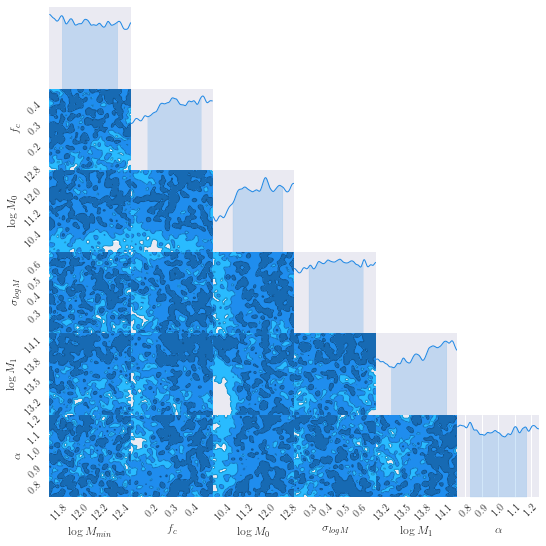

In [48]:
fig = c.plotter.plot(figsize=(8,8), parameters=param_names)#, truth = true_vals)# parameters = [param_names[i] for i in (1, 4)])
                    #, truth = true_vals)
fig.show()

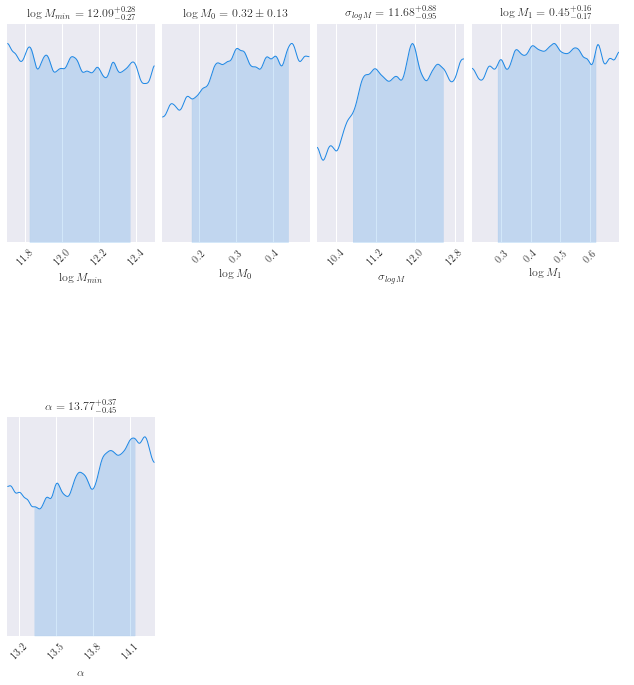

In [31]:
#c.configure(statistics='max')
fig = c.plotter.plot_distributions(figsize=(10,10) )
fig.show()

In [32]:
gelman_rubin_converged = c.diagnostic.gelman_rubin()
print gelman_rubin_converged

Gelman-Rubin Statistic values for chain 0
$\log{M_{min}}$: 1.15993 (Failed)
$\log{M_0}$: 1.18436 (Failed)
$\sigma_{log{M}}$: 1.18803 (Failed)
$\log{M_1}$: 1.16115 (Failed)
$\alpha$: 1.17141 (Failed)
False


In [33]:
np.sqrt(np.diag(c.analysis.get_covariance()[1]))

array([ 0.23167268,  0.11223994,  0.81066784,  0.14199288,  0.34791982])

In [34]:
summary  = c.analysis.get_summary()
for key, val in summary.iteritems():
    print key, val[1]

$\alpha$ 13.7701967961
$\log{M_1}$ 0.454513134148
$\log{M_{min}}$ 12.0872542913
$\sigma_{log{M}}$ 11.6836114446
$\log{M_0}$ 0.315120919806


In [35]:
MAP = np.array([summary[p][1] for p in param_names])
print MAP

[ 12.08725429   0.31512092  11.68361144   0.45451313  13.7701968 ]


In [36]:
print param_names

['$\\log{M_{min}}$', '$\\log{M_0}$', '$\\sigma_{log{M}}$', '$\\log{M_1}$', '$\\alpha$']
